In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math

## Rename columns

In [3]:
data = pd.read_csv('dataset.csv', delimiter=",")

# Print the current column names
print(data.columns)

# Change the name of a column
#data.rename(columns={"old_name": "new_name"}, inplace=True)
data.rename(columns={"C1_TRI_final (year)": "Payback_Years"}, inplace=True)
data.rename(columns={"C3_RedCo2_final (CO2)": "Carbon_Reduction"}, inplace=True)
data.rename(columns={"C4_STD_final" : "Rooftop_Difficulty_level"}, inplace= True)
data.rename(columns={"irradiance_final (kWh/m2/an)": "Irradiance"}, inplace=True)
data.rename(columns={"commune_final": "Municipality"}, inplace=True)
data.rename(columns={"lieu_final": "Canton"}, inplace=True)
data.rename(columns={"area_final": "Rooftop_Surface"}, inplace=True)
data.rename(columns={"C5_Patrim_final": "Heritage_Level"}, inplace=True)

data = data.replace({'Municipality': {'Ã«' :'ë','Ã¨': 'e', 'Ã©': 'e', "Ãª": "e", "Ã´": "e","ÃƒÂ¨":"e","ÃƒÂ´":"e","ÃƒÂª":"e","Ãƒâ€°":"e","ÃƒÂ©":"e","�����":"e","����":"e","Ã‰":"e"}}, regex=True)

# Print the updated column names
print(data.columns)
print(data.head())


Index(['Unnamed: 0', 'EGID_final', 'C1_TRI_final (year)', 'C2_Autosuf_final',
       'C3_RedCo2_final (CO2)', 'C4_STD_final', 'C5_Patrim_final',
       'irradiance_final (kWh/m2/an)', 'commune_final', 'CP_final',
       'lieu_final', 'area_final', 'C2_Autocons_final', 'Conso_Elec_new'],
      dtype='object')
Index(['Unnamed: 0', 'EGID_final', 'Payback_Years', 'C2_Autosuf_final',
       'Carbon_Reduction', 'Rooftop_Difficulty_level', 'Heritage_Level',
       'Irradiance', 'Municipality', 'CP_final', 'Canton', 'Rooftop_Surface',
       'C2_Autocons_final', 'Conso_Elec_new'],
      dtype='object')
   Unnamed: 0  EGID_final  Payback_Years  C2_Autosuf_final  Carbon_Reduction   
0           0      295074           9999          0.545339         41.340292  \
1           1      804984             11          0.304367         47.527463   
2           2      804985             17          0.308292         51.120779   
3           3      804986             16          0.197884         50.848925  

## Data overview

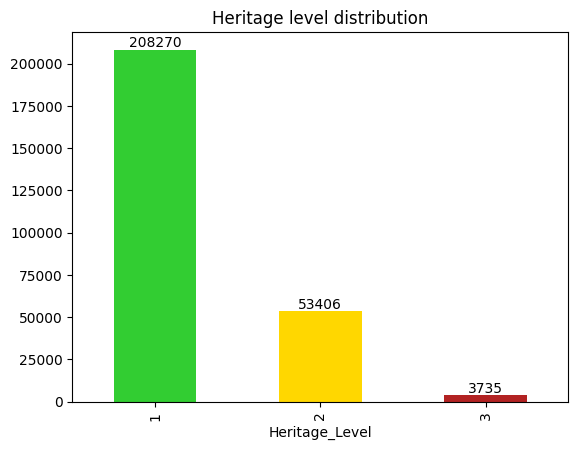

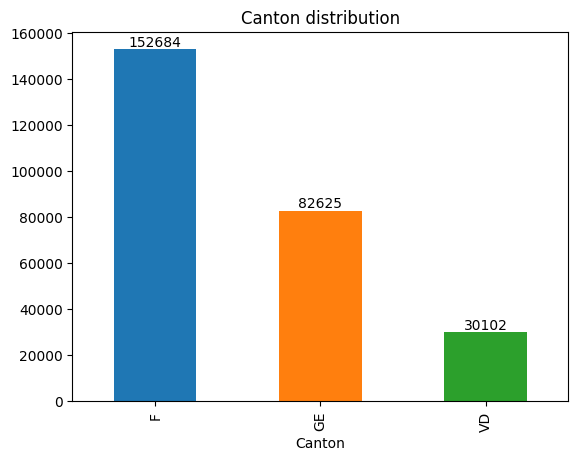

<Axes: title={'center': 'Heritage Level distribution by Canton'}, xlabel='Canton'>

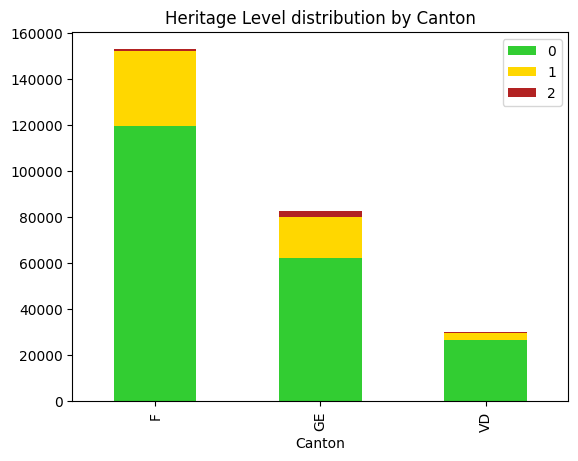

In [95]:
colors = ["limegreen", "gold", "firebrick"]
data["Heritage_Level"].value_counts().plot(kind="bar", title="Heritage level distribution", color = colors)
ax = plt.gca()
ax.bar_label(ax.containers[0], fmt = '{0:.0f}')
plt.show()

colors = ["tab:blue", "tab:orange", "tab:green"]
data["Canton"].value_counts().plot(kind="bar", title="Canton distribution", color = colors)
ax = plt.gca()
ax.bar_label(ax.containers[0], fmt = '{0:.0f}')
plt.show()

stacked = data[["Canton", "Heritage_Level"]]
stacked = stacked.groupby(["Canton"]).value_counts().to_frame("Count").reset_index()
stacked = stacked.pivot_table(values="Count", index=['Canton'], columns=stacked.index).reset_index()
stacked_ge = stacked[[3,4,5]][1:2].iloc[0].to_list()
stacked_vd = stacked[[6,7,8]][2:].iloc[0].to_list()
for i in range(len(stacked_ge)):
    stacked.at[1, i] = stacked_ge[i]
for i in range(len(stacked_vd)):
    stacked.at[2, i] = stacked_vd[i]
stacked = stacked[["Canton", 0,1,2]]
stacked = stacked.set_index("Canton")
stacked.plot(kind="bar", stacked=True, title="Heritage Level distribution by Canton", color = ["limegreen", "gold", "firebrick"] )


In [5]:
print(data["Irradiance"].describe())
print(data["Rooftop_Difficulty_level"].describe())
print(data["Payback_Years"].describe())

count    253476.000000
mean       1218.920051
std         149.660925
min           0.000000
25%        1118.235280
50%        1233.629335
75%        1337.045163
max        1590.019237
Name: Irradiance, dtype: float64
count    265411.000000
mean         11.574951
std           6.886418
min           0.000000
25%           6.853562
50%          10.539758
75%          15.742657
max          42.679894
Name: Rooftop_Difficulty_level, dtype: float64
count    265411.000000
mean       2122.321226
std        4066.434405
min           0.000000
25%          15.000000
50%          20.000000
75%          56.000000
max        9999.000000
Name: Payback_Years, dtype: float64


In [72]:
print("Total Surface available (km2):")
print(data["Rooftop_Surface"].sum()/1e6)
print("Total Carbon Reduction (tCO2eq) :")
print(data["Carbon_Reduction"].sum())

Total Surface available (km2):
14.643032
Total Carbon Reduction (tCO2eq) :
11555365.00925972


## Comparaison Cantons et Niveaux de protection

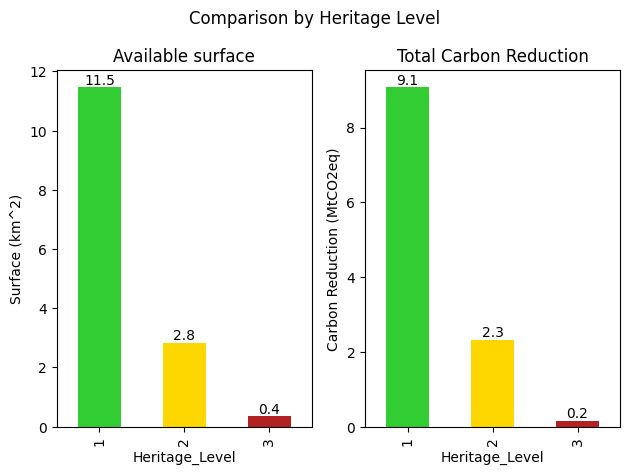

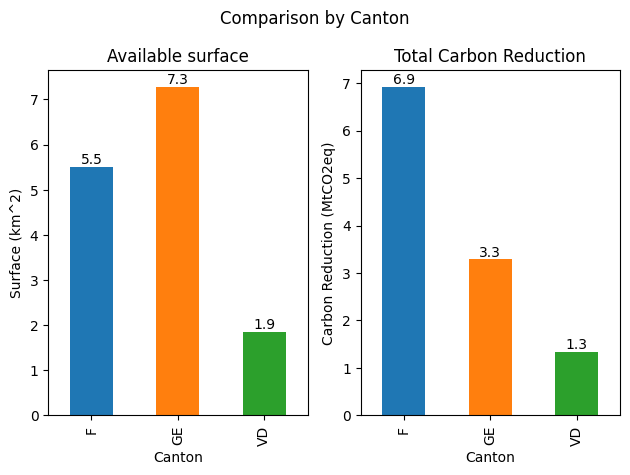

In [96]:
fig, axes = plt.subplots(1,2)
colors = ["limegreen", "gold", "firebrick"]
data.groupby(by = "Heritage_Level")["Rooftop_Surface"].apply(lambda x : x/1e6).groupby(by = "Heritage_Level").sum().plot(ax = axes[0], kind = "bar", title= "Available surface", color = colors)
axes[0].bar_label(axes[0].containers[0], fmt = '{0:.1f}')
axes[0].set_ylabel("Surface (km^2)")


data.groupby(by = "Heritage_Level")["Carbon_Reduction"].apply(lambda x : x/1e6).groupby(by = "Heritage_Level").sum().plot(ax = axes[1], kind = "bar", title= "Total Carbon Reduction",color = colors)
axes[1].bar_label(axes[1].containers[0], fmt = '{0:.1f}')
axes[1].set_ylabel("Carbon Reduction (MtCO2eq)")
fig.suptitle("Potential comparison by Heritage Level")
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(1,2)
colors = ["tab:blue", "tab:orange", "tab:green"]
data.groupby(by = "Canton")["Rooftop_Surface"].apply(lambda x : x/1e6).groupby(by = "Canton").sum().plot(ax = axes[0] ,kind = "bar", title= "Available surface", color=colors)
axes[0].bar_label(axes[0].containers[0], fmt = '{0:.1f}')
axes[0].set_ylabel("Surface (km^2)")

data.groupby(by = "Canton")["Carbon_Reduction"].apply(lambda x : x/1e6).groupby(by = "Canton").sum().plot(ax = axes[1] ,kind = "bar", title= "Total Carbon Reduction", color = colors)
axes[1].bar_label(axes[1].containers[0], fmt = '{0:.1f}')
axes[1].set_ylabel("Carbon Reduction (MtCO2eq)")
fig.suptitle("Potential comparison by Canton")
fig.tight_layout()

plt.show()

df = pd.DataFrame(data.groupby(by = "Canton")["Rooftop_Surface"].apply(lambda x : x/1e6).groupby(by = "Canton").sum())


# df_group = pd.concat([df, pd.DataFrame(data.groupby(by = "Canton")["Carbon_Reduction"].apply(lambda x : x/1e6).groupby(by = "Canton").sum()) ], axis=1)
# df_group.plot(kind = "bar") 
# ax = plt.gca()
# for c in ax.containers:
#     ax.bar_label(c)
# plt.show()

## Consommation élèc Grand Genève

In [8]:
import unicodedata

def remove_accents(input_str):
    if type(input_str) != str:
        return str(input_str)
    
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii

# coté France
df_conso_fr = pd.read_csv("conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-commune.csv", sep=";")

C:\Users\bertrand\AppData\Local\Temp\ipykernel_9596\244498593.py:12: DtypeWarning: Columns (25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_conso_fr = pd.read_csv("conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-commune.csv", sep=";")


In [9]:
communes_fr_normalise = data[data["Canton"] == "F"]["Municipality"].replace({"Valserhene" : "Valserhône", 'city' : 'ville', 'cities' : 'villes'}, regex=True).apply(lambda commune : remove_accents(commune).lower()).unique()

df_conso_fr["libelle_commune_normalise"] = df_conso_fr["libelle_commune"].apply(lambda commune : remove_accents(commune).lower())
df_conso_fr = df_conso_fr[ df_conso_fr["filiere"] != "Gaz"]
df_conso_gg = df_conso_fr[df_conso_fr["libelle_commune_normalise"].isin(communes_fr_normalise)]
df_conso_gg = df_conso_gg.where((df_conso_gg["libelle_departement"] == "Ain") | (df_conso_gg["libelle_departement"] == "Haute-Savoie"))
df_conso_gg = df_conso_gg[df_conso_gg["annee"] == 2021]
df_conso_gg = df_conso_gg.dropna()

print("Communes en suisse pas F :")
print([c for c in communes_fr_normalise if c not in df_conso_gg["libelle_commune_normalise"].unique()])


df_conso_gg.to_csv("conso_communes_fr_grand_geneve.csv", sep=";")

consot_fr = df_conso_gg["consot"].sum() / 1000000

print("Consommation totale (TWh) grand genève fr 2021 :")
print(consot_fr)


Communes en suisse pas F :
[b'thenex', b'perly-certoux', b'bardonnex']
Consommation totale (TWh) grand genève fr 2021 :
1.7029558145102994


In [10]:
consot_vaud_entier = 4289943 # Source https://www.vd.ch/fileadmin/user_upload/organisation/dfin/statvd/Dom_08/Tableaux/T08.03.02.xlsx
superficie_vaud_entier = 3212
superficie_district_nyon = 307.3
consot_vaud = consot_vaud_entier * superficie_district_nyon / superficie_vaud_entier / 1000000
print("Estimation Consommation totale (TWh) grand genève vaud 2021 :")
print(consot_vaud )

Estimation Consommation totale (TWh) grand genève vaud 2021 :
0.41042947817559156


In [11]:
consot_gnv = 2.709 # Source https://statistique.ge.ch/domaines/apercu.asp?dom=08_02
print("Consommation totale (TWh) grand genève genevois 2021 :")
print(consot_gnv)

Consommation totale (TWh) grand genève genevois 2021 :
2.709


In [12]:
consot_grand_geneve = consot_gnv + consot_fr + consot_vaud
print("Consommation totale (TWh) grand genève 2021 :")
print(consot_grand_geneve)

Consommation totale (TWh) grand genève 2021 :
4.822385292685891


In [13]:
# resultat produit en croix : math.sqrt((18.25**2)*consot_grand_geneve/60)

surface_necessaire_t = (consot_grand_geneve * 1e9)/180/1e6
cote_carre = math.sqrt(surface_necessaire_t)

print("Surface nécessaire estimée (km^2) pour couvrir consommation Grand-Genève : ")
print(surface_necessaire_t)
print("Soit un carré de coté (km) :")
print(cote_carre)



Surface nécessaire estimée (km^2) pour couvrir consommation Grand-Genève : 
26.791029403810505
Soit un carré de coté (km) :
5.176005158789016


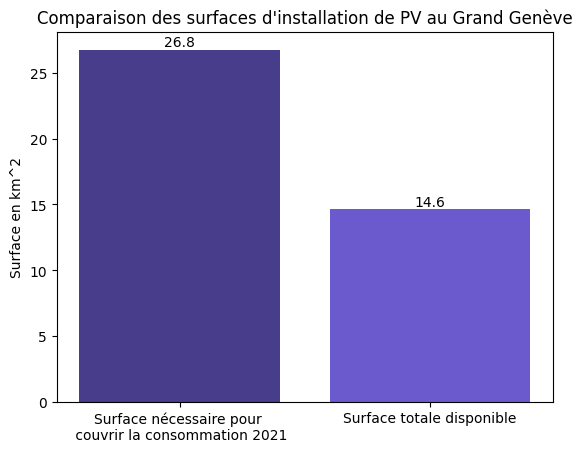

Pourcentage : 54.6564739237579


In [84]:
available_surface_t = data["Rooftop_Surface"].sum()/1e6 #km^2

coverage_percentage_gg = available_surface_t / surface_necessaire_t * 100

plt.bar(["Surface nécessaire pour \n couvrir la consommation 2021", "Surface totale disponible"], [surface_necessaire_t, available_surface_t], color = ["darkslateblue", "slateblue"])
ax = plt.gca()
ax.bar_label(ax.containers[0], fmt = '{0:.1f}')
plt.ylabel("Surface en km^2")
plt.title("Comparaison des surfaces d'installation de PV au Grand Genève")
plt.show()
print(f"Pourcentage : {coverage_percentage_gg}")

# Rajouter surface déjà exploitée